# Task #1 : Prediction using Supervised ML 
## Predict the percentage of marks of an student based on the number of study hours
## Author : Sushant Pagam

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

###  Step 1 :  Load the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


### Step 2 : Separation of independent and dependent matrices


In [5]:
X = data.iloc[:,:-1].values

In [6]:
# Independent Matrix
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y = data.iloc[ : , 1:].values

In [8]:
# Dependent Matrix
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Step 3 : Preparation training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train

array([[8.3],
       [9.2],
       [6.1],
       [7.4],
       [2.5],
       [5.5],
       [3.8],
       [3.5],
       [8.5],
       [1.9],
       [5.1],
       [2.7],
       [3.2],
       [2.5],
       [7.8],
       [6.9],
       [1.1],
       [4.8],
       [3.3],
       [2.7]])

In [11]:
y_test

array([[20],
       [85],
       [95],
       [41],
       [62]], dtype=int64)

### Step 4 : Applying suitable ML algorithm

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_predictor = regressor.predict(X_test)

In [16]:
y_predictor

array([[17.61841519],
       [76.24291394],
       [87.58959112],
       [45.98510813],
       [59.22289817]])

## What will be predicted score if a student studies for 9.25 hrs/ day? 

In [17]:
hrs_per_day = 9.25

In [18]:
# To convert scalar value 9.25 to 2d array as predictor takes only 2d array parameter
hrs_per_day = np.array(hrs_per_day).reshape(1,-1)

In [19]:
predicted_score = regressor.predict(hrs_per_day)

In [20]:
predicted_score

array([[90.89903863]])

## Hence predicted score is 94 (93.69) if a student studies for 9.25 hrs/ day

### Step 5 : Plot a graph to check difference in Actual & Predicted values

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Hrs/day vs Score (Training)')

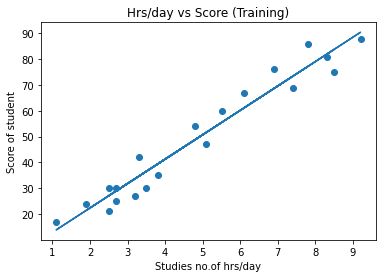

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train))
plt.xlabel('Studies no.of hrs/day')
plt.ylabel('Score of student')
plt.title('Hrs/day vs Score (Training)')

Text(0.5, 1.0, 'Hrs/day vs Score (Test)')

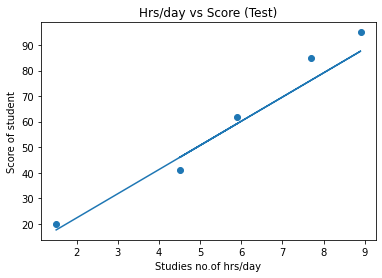

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.predict(X_test))
plt.xlabel('Studies no.of hrs/day')
plt.ylabel('Score of student')
plt.title('Hrs/day vs Score (Test)')